In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Activation Functions

![](https://user-images.githubusercontent.com/36406676/52912218-bf547080-32f1-11e9-8cf7-cefdf1a1c167.PNG)

입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화 함수라 합니다.


'활성화'라는 이름이 말해주듯 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 합니다. 


활성화함수로 쓸 수 있는 여러 후보들을 알아보겠습니다.


![](https://user-images.githubusercontent.com/36406676/52198187-54447c00-28a5-11e9-91da-a037f8cdd733.PNG)

## Sigmoid

- 특징
    - output의 범위가 0과 1이 되게 한다
    - neuron의 firing rate을 잘 나타낸다고 생각되어서 인기가 많았다. 

- 단점
    - 극단값들의 gradient는 결국 0이 되어 의미가 없어진다.
    - sigmoid의 output은 0이 중심이 되지 않는다. -> 레이어가 두개 쌓이면 두번째 레이어에 들어가는 input은 모두 양수가 된다. 항상 양수인 input이 들어오면 w에 대한 gradient은 all positive all negative. w vector가 비효율적으로 찾아진다.
    
    - 함수에 exp()가 들어가면 computational cost가 높아진다
    
### 우리가 활성화 함수로 비선형 함수를 쓰는 이유는??
선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문입니다.

선형함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있습니다. 

예를들면 h(x) = cx를 활성화 함수로 사용한 3층 네트워크를 떠올려보면 이 계산은 결국 y(x)는 C \* C \* C\* x 처럼 곱셈을 3번 실행하지만 실은 y = ax랑 같은 식입니다. 

즉 은닉층이 없는 네트워크로 표현할 수 있습니다. 이 예처럼 선형함수를 이용해서는 여러 층으로 구성하는 이점을 살릴순 없습니다.

그래서 층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 써야합니다.

![](https://user-images.githubusercontent.com/36406676/52912692-1b21f800-32f8-11e9-99f0-3dc76107dad9.PNG)

In [4]:
def Sigmoid(x):
    return 1 / ( 1+ np.exp(-x))

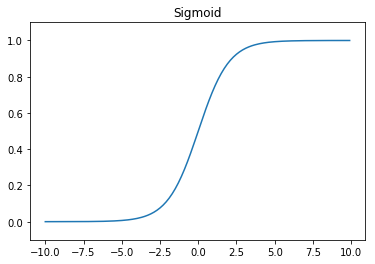

In [5]:
x = np.arange(-10,10,0.1)
y = Sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.title("Sigmoid")
plt.show()

## ReLU

- 특징
    - (+)부분에서 output부분은 뭉개지 않는다.(Sigmoid에서는 x값이 커지면 gradient 0에 가까워진다 )
    - exp()이 없어서 컴퓨팅적으로 효율적이다. 함수 간단
    - sigmoid나 tanh보다 빨리 converge한다.
    - sigmoid보다 neuron의 작용을 더 잘 반영한다.
- 단점
    - 역시 0이 중심인 output은 아니다.
    - 0보다 작은 부분의 gradient는 0이 되어버린다.
    
ReLU를 보완한 Leaky ReLU, PReLU등이 있다. 실제적으로 ReLU을 사용하면 좋다. (단 learning rate 설정 유의)

Sigmoid는 별로 효과가 좋지 않다. 초반에 나온것이라 사용되었던 거지 지금은 ReLU를 많이 쓴다.

In [6]:
def ReLU(x):
    return x * (x > 0)

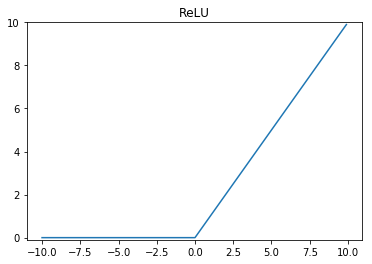

In [7]:
x = np.arange(-10,10,0.1)
y = ReLU(x)
plt.plot(x,y)
plt.ylim(-0.1,10)
plt.title("ReLU")
plt.show()

## Leaky ReLU

- ReLU에서는 input이 0보다 작으면 gradient가 죽지만 Leaky ReLU는 산다. 


- ReLU의 단점을 보완. ReLU에서는 0 아니면 양수만 출력되었지만 Leaky ReLU에서는 음수도 출력된다.(Does not saturate)


- sigmoid나 tanh 보다 빠르게 수렴한다.


![](https://user-images.githubusercontent.com/36406676/52913251-94711900-32ff-11e9-81bd-e5d25e55f3b4.PNG)

In [29]:
def Leaky_ReLU(x):
    return np.where(x > 0, x, x * 0.01)

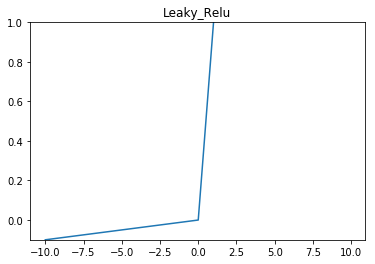

In [30]:
x = np.arange(-10,10,0.1)
y = Leaky_ReLU(x)
plt.plot(x,y)
plt.ylim(-0.1,1)
plt.title("Leaky_Relu")
plt.show()

## Tanh(x)

- 0을 기준으로 퍼뜨리지만 sigmoid와 마찬가지로 gradient가 죽는 문제가 생긴다. 

![](https://user-images.githubusercontent.com/36406676/52917506-b08cae80-332f-11e9-9abc-d08683670427.PNG)

In [31]:
def Tanh(x):
    return (np.exp(2*x) -1) / (np.exp(2*x) +1)

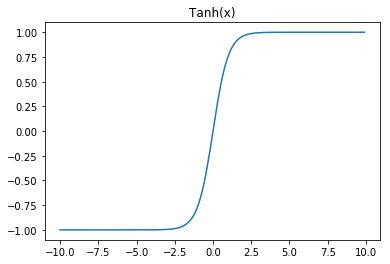

In [32]:
x = np.arange(-10,10,0.1)
y = Tanh(x)
plt.plot(x,y)
plt.title("Tanh(x)")
plt.ylim(-1.1,1.1)
plt.show()

## ELU

- ReLU의 장점을 지니고 Leaky Relu에서 이상치에 해당하는 값에 영행이 적다(음수에서 부드럽게 꺾인다)


- exp() 때문에 계산량이 많다

![](https://user-images.githubusercontent.com/36406676/52917574-77a10980-3330-11e9-9867-7b20d8900738.PNG)

In [33]:
def ELU(x,a):
    return np.where(x>=0, x, a*(np.exp(x)-1))

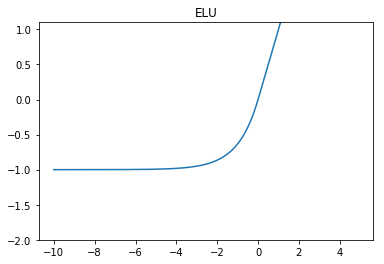

In [34]:
x = np.arange(-10,5,0.1)
y = ELU(x,1)
plt.plot(x,y)
plt.title("ELU")
plt.ylim(-2,1.1)
plt.show()

## Sigmoid의 단점을 알아보자

![](https://user-images.githubusercontent.com/36406676/52198102-1fd0c000-28a5-11e9-9dc6-ea97aa4943c8.PNG)

In [35]:
class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self,x):
        self.x = x
        out = 1 / ( 1+ np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = (1-self.out)*(self.out)
        return dx
        

In [36]:
sigmoid_layer1 = Sigmoid()
sigmoid_layer2 = Sigmoid()
sigmoid_layer3 = Sigmoid()


In [37]:
x1 = 10
x2 = 0
x3 = -10

In [38]:
print(sigmoid_layer1.forward(x1)) # 1에 가까운 수
print(sigmoid_layer2.forward(x2)) # 0.5
print(sigmoid_layer3.forward(x3)) # 0에 가까운 수 0혹은 양수만 출력된다. 다음 레이어 들어갈때 문제가 생긴다. 

0.9999546021312976
0.5
4.5397868702434395e-05


In [39]:
print(sigmoid_layer1.backward(1)) # 0에 가까움
print(sigmoid_layer2.backward(1)) # 0.25 정상
print(sigmoid_layer3.backward(1)) # 0에 가까움 gradient가 죽는다. 조금만 크거나 작아도 gradient값이 0에 가까워진다. 

4.5395807735907655e-05
0.25
4.5395807735951673e-05


## 이번엔 ReLU에 대입해보자

![](https://user-images.githubusercontent.com/36406676/52200301-c91ab480-28ab-11e9-89f2-216bf4e52be2.PNG)

In [40]:
class Relu:
    def __init__(self):
        pass
    
    def forward(self,x):
        self.x = x
        out= self.x * (self.x > 0)
        self.out = out
        return out
    
    def backward(self, dout):
        dx = np.where(self.x >=0, dout*self.x,0)
        return dx
        

In [41]:
relu_layer1 = Relu()
relu_layer2 = Relu()
relu_layer3 = Relu()


In [42]:
x1 = 10
x2 = 0
x3 = -10

In [43]:
print(relu_layer1.forward(x1)) # 10
print(relu_layer2.forward(x2)) # 0
print(relu_layer3.forward(x3)) # 0  0혹은 양수만 출력된다. 

10
0
0


In [44]:
print(relu_layer1.backward(1)) # 10  input이 커도 gradient가 죽지 않는다. 
print(relu_layer2.backward(1)) #  0
print(relu_layer3.backward(1)) #  0 0보다 작은 구간에서는 graident가 죽는다 

10
0
0


## Data Preprocessing

데이터 전처리에 주로 zero_centereing을 많이 사용한다. 이미지 처리에서는 normalization까지 하지는 않는다.

![](https://user-images.githubusercontent.com/36406676/52917791-d071a180-3332-11e9-8f95-93aa962dcd46.PNG)

앞에서 말했듯이 normalize해서 중앙을 0으로 맞춰주지 않으면 웨이트 업데이트가 비효율적으로 이뤄진다.

![](https://user-images.githubusercontent.com/36406676/52917827-20e8ff00-3333-11e9-83fd-f1a6c6a40600.PNG)

## Weight Initialization

weight를 처음에 어떻게 시작하는지에 따라 학습과정이 달라질 수 있으므로 weight initialization은 중요합니다.

가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지 살펴봅시다.

구체적으로는 활성화 함수로 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입력 데이터를 흘리며 각 층의 활성화 값 분포를 히스토그램으로 그려 살펴보겠습니다.

- 표준편차가 1인 정규분포

In [10]:
input_data = np.random.randn(1000,100) # 1000개의 데이터
node_num = 100                         # 각 은닉층의 노드 수
hidden_layer_size = 5                  # 은닉충이 5개
activations = {}                       # 이곳에 활성화 결과(활성화값)를 저장

In [11]:
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #variation  of initializers
    w = np.random.randn(node_num, node_num) *1 # 가중치의 표준편차 1
    a = np.dot(x,w)
        
    #variation of activation functions
    z = Sigmoid(a)
        
    activations[i] = z

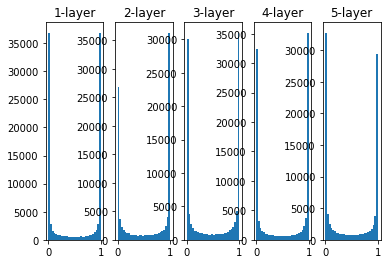

In [12]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30)
plt.show()

각 층의 활성화 값들이 0과 1에 치우쳐 분포되어있다. 


여기에서 사용한 시그모이드 함수는 그 출력이 0에 가까워지면 그 미분은 0에 가까워진다.


그래서 데이터가 0과1에 치우쳐 분포하게 되면 역전파의 기울기 값이 작아지다가 사라집니다.(기울기 소실 문제)

&nbsp;

- 표준편차를 0.01로 한 정규분포

In [13]:
activations = {}
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #variation  of initializers
    w = np.random.randn(node_num, node_num) *0.01 # 가중치의 표준편차 0.01
    a = np.dot(x,w)
        
    #variation of activation functions
    z = Sigmoid(a)
        
    activations[i] = z

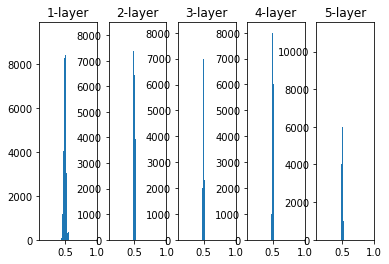

In [14]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30)
    plt.xlim(0.1,1)
plt.show()

0.5 부근에 집중되어있다.


앞의 예처럼 0과 1로 치우치진 않았으니 기울기 소실 문제는 일어나지 않았으나 활성화값들이 치우쳤다는 것은 표현력 관점에서 큰 문제가 있는 것이다. 


이 상황에서 다수의 뉴런이 같은 값을 출력하고 있으니 뉴런을 여러개 둔 의미가 없어진다는 뜻입니다.


예를 들어 뉴런을 100개가 거의 같은 값을 출력한다면 뉴런 1개짜리와 별반 다를게 없는 것이다. 


그래서 활성화 값들이 치우치면 **표현력을 제한한다는 점**에서 문제가 됩니다.

&nbsp;

- Xavier 초깃값을 사용


     - Xavier초깃값을 사용하면 앞 층의 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 펴집니다. 
     - sigmoid와 tanh함수는 좌우대칭이라 중앙부근이 선형인 함수로 볼 수 있다. 그래서 Xavier초깃값이 적당하다.
     - 반면 ReLU를 이용할 때는 ReLU에 특화된 초깃값을 이용하라고 권장된다 - He초깃값
     - ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요하다.(직감적으로)

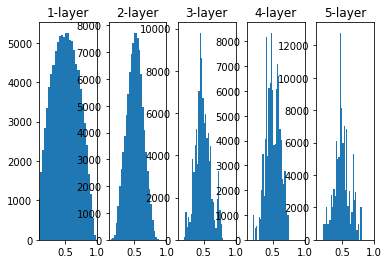

In [15]:
activations = {} 
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #variation  of initializers
    w = np.random.randn(node_num, node_num) * np.sqrt(1/node_num) # 1/sqrt(n)
    a = np.dot(x,w)
        
    #variation of activation functions
    z = Sigmoid(a)
        
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30)
    plt.xlim(0.1,1)
plt.show()


이 결과를 보면 층이 깊어지면서 형태가 다소 일그러지지만 본 방식보다는 확실히 넓게 분포됨을 알 수 있습니다. 각

층에 흐르는 데이터는 적당히 퍼져있으므로 시그모이드 함수의 표현력도 제한 받지 않아 학습이 효율적으로 이뤄질 것으로 기대됩니다.

## ReLU에서의 weight_Initilization

&nbsp;

Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과입니다.

sigmoid함수와 tanh함수는 좌우 대칭이라 중앙부근이 선형인 함수로 볼 수 있다. 

그래서 Xavier초깃값이 적당합니다. 반면 ReLU를 이용할때는 ReLU에 특화된 초기값을 이용하라고 권장합니다. 

이특화된 토기값을 He초깃값이라고 합니다. Xavier초기값이 sqrt(1/n) 이였다면 He초기값은 표준편차가 sqrt(2/n)인 정규분포를 사용합니다.

ReLU는 음의 영역이 0이라소 더 넓ㄱ게 분포시키기 위해 2배의 계수가 필요하다고 해석하면 됩니다.

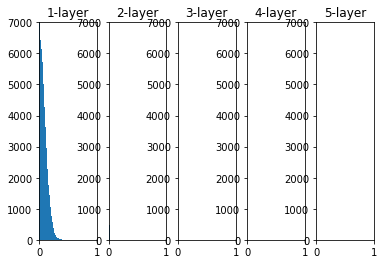

In [16]:
activations = {} 
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #variation  of initializers
    w = np.random.randn(node_num, node_num) *0.01 # 가중치의 표준편차 1
    a = np.dot(x,w)
        
    #variation of activation functions
    z = ReLU(a)
        
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30)
    plt.xlim(0,1)
    plt.ylim(0,7000)
plt.show()

결과를 보면 std = 0.01일 때의 각층의 활성화 값들이 아주 작은 값들입니다. 

신경망에 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아진다는 뜻
이는 중대한 문제이며 실제로도 학습이 이뤄지지 않을 것이다.

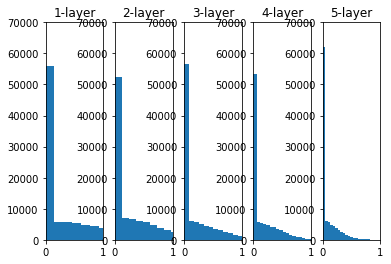

In [17]:
activations = {} 
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #variation  of initializers
    w = np.random.randn(node_num, node_num) * np.sqrt(1/node_num) # 가중치의 표준편차 1
    a = np.dot(x,w)
        
    #variation of activation functions
    z = ReLU(a)
        
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30)
    plt.ylim(0,70000)
    plt.xlim(0,1)
plt.show()

Xavier초깃값 결과를 보면 이쪽은 층이 깊어지면서 치우침이 조금씩 커진다 .(숫자 0에 가까워진다)

실제로 층이 깊어지면 활성화값들의 치우침도 커지고 학습할 때 '기울기 소실' 문제를 일으킵니다. 

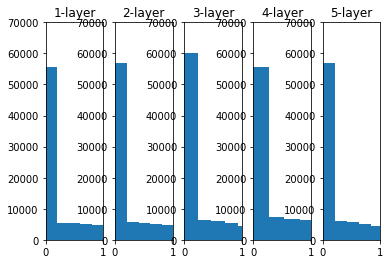

In [106]:
activations = {} 
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #variation  of initializers
    w = np.random.randn(node_num, node_num) * np.sqrt(2/node_num) # He
    a = np.dot(x,w)
        
    #variation of activation functions
    z = ReLU(a)
        
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30)
    plt.ylim(0,70000)
    plt.xlim(0,1)
plt.show()

마지막으로 He초깃값은 모든 층에서 균일하게 분포되어있습니다. 

층이 깊어져도 분포가 균일하게 유지되어 역전파때도 적절한 값이 나올 것으로 기대되고 있습니다. 

## MNIST셋으로 본 가중치 비교
![](https://user-images.githubusercontent.com/36406676/52928727-9a5d0d80-3384-11e9-9a5b-628217c5cae7.PNG)

이 실험은 층별 뉴런 수가 100개인 5층 신경망에서 활성화 함수로 ReLU를 사용했습니다. 

std = 0.01일 때는 학습이 전혀 이뤄지지 않습니다. 앞서 활성화값의 분포에서 본것처럼 std = 0.01일 때는 순전파때 값이 너무 작은 값이 흐르기 때문입니다. 

그로 인해 역전파때의 기울기도 작아져 가중치가 거의 갱신되지 않습니다.

반대로 Xavier와 He 초깃값의 경우는 학습이 순조롭게 이뤄지고 있습니다.

학습 진도는 He초기값 쪽이 더 빠르다

## Batch Normalization

PR12 딥러닝 논문읽기 내용 참조

- batch normalization은 batch의 dimension마다 unit gaussain activation을 만들어주는 과정이다.


- Deep Learning에서 Layer가 많아질 때 학습이 어려워지는 이유는 weoght의 미세한 변화들이 가중이 되어 쌓이게 되면 Hidden Layer가 높아질 수록 값의 변화가 커지기 때문입니다.


- Training 셋의 분포와 Test셋의 분포가 다르다면 학습이 안되는 것과 같이 딥러닝의 weight를 학습하는 것 또한 처음에 학습하였던 노드의 분포와 다음에 학습하는 분포가 다르게 되면 학습이 잘 안되게 되고 논문의 저자는 이러한 문제를 Internal Covariate Shift라고 정의

 ![](https://user-images.githubusercontent.com/36406676/52929038-f83e2500-3385-11e9-9eb9-79e412a91f33.PNG)